In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
stat = pd.read_csv('Статистика за 2018 год.csv', engine='python')

In [3]:
stat['Статус партии по БЛ'] = stat['Число бракованных листов'] > 3
stat['Статус скорости прокатки партии'] = stat['Скорость прокатки'] > 4

In [4]:
for i in stat.index:
    if stat.loc[stat.index[i], 'Статус партии по БЛ'] == True:
        stat.loc[stat.index[i], 'Статус партии по БЛ'] = 'Бракованных листов в партии больше 3'
    else:
        stat.loc[stat.index[i], 'Статус партии по БЛ'] = 'Бракованных листов в партии равно или меньше 3'

In [5]:
for i in stat.index:
    if stat.loc[stat.index[i], 'Статус скорости прокатки партии'] == True:
        stat.loc[stat.index[i], 'Статус скорости прокатки партии'] = 'Скорость проката больше 4'
    else:
        stat.loc[stat.index[i], 'Статус скорости прокатки партии'] = 'Скорость проката равно или меньше 4'

### Задание 1
Сотрудник службы оценки качества продукции заметил, что число бракованных листов стали в партии для стали марки A больше, чем для стали марки B. Также он обратил внимание, что при средней скорости прокатки более 4 м/с число бракованных листов больше. В соответствии с этими наблюдениями, предлагается снизить скорость прокатки и ввести дополнительные меры контроля качества для стали марки A.  
Обоснуйте, что:
1. Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B.
2. При скоростях прокатки более 4 м/с свыше 3 бракованных листов стали на партию выходит значимо чаще, чем при меньших скоростях прокатки. 


### Чему равен коэффицент бракованных партий для каждой марки стали?
коэффицент бракованных партий = количество партий с более чем тремя бракованными листами / общее количество партий 

In [6]:
pivot1 = pd.pivot_table(stat, values='Число бракованных листов', 
                       index=['Марка стали','Статус партии по БЛ'], 
                       aggfunc=len).rename(columns = {'Число бракованных листов': 'Число партий'})

In [7]:
print(pivot1)

                                                            Число партий
Марка стали Статус партии по БЛ                                         
A           Бракованных листов в партии больше 3                      53
            Бракованных листов в партии равно или меньше 3            86
B           Бракованных листов в партии больше 3                      44
            Бракованных листов в партии равно или меньше 3            54


In [41]:
def spoil_coef(piv,col,n1,n2):
    a = piv.loc[piv.index[n1],col]
    b = piv.loc[piv.index[n1],col] + piv.loc[piv.index[n2],col]
    mark_spoil_coef = a / b
    return mark_spoil_coef

In [44]:
A_mark_spoil_coef = spoil_coef(pivot1,'Число партий', 0, 1)
print(A_mark_spoil_coef)

0.381294964028777


In [51]:
B_mark_spoil_coef = spoil_coef(pivot1,'Число партий', 2, 3)
print(B_mark_spoil_coef)

0.4489795918367347


In [52]:
A_mark_spoil_coef > B_mark_spoil_coef

False

### Сколько в среднем приходится бракованных листов на одну партию?

In [13]:
pivot2 = pd.pivot_table(stat, values='Число бракованных листов', 
                       index=['Марка стали','Статус партии по БЛ'], 
                       aggfunc=np.sum)

In [35]:
print(pivot2)

                                                            Число бракованных листов
Марка стали Статус партии по БЛ                                                     
A           Бракованных листов в партии больше 3                                 271
            Бракованных листов в партии равно или меньше 3                       171
B           Бракованных листов в партии больше 3                                 215
            Бракованных листов в партии равно или меньше 3                       115


In [53]:
A_mark_avg_spoil_sheet = ((pivot2.loc[pivot2.index[0],'Число бракованных листов'] + 
                           pivot2.loc[pivot2.index[1],'Число бракованных листов']) /
                          (pivot1.loc[pivot1.index[0],'Число партий'] + 
                           pivot1.loc[pivot1.index[1],'Число партий']))
print(A_mark_avg_spoil_sheet)

3.179856115107914


In [54]:
B_mark_avg_spoil_sheet = ((pivot2.loc[pivot2.index[2],'Число бракованных листов'] + 
                           pivot2.loc[pivot2.index[3],'Число бракованных листов']) / 
                          (pivot1.loc[pivot1.index[2],'Число партий'] + 
                           pivot1.loc[pivot1.index[3],'Число партий']))
print(B_mark_avg_spoil_sheet)

3.36734693877551


In [55]:
A_mark_avg_spoil_sheet > B_mark_avg_spoil_sheet

False

In [18]:
results_1 = pd.DataFrame(
    {'Марка стали': ['A', 'B'],
     'Коэффициент бракованных партий': [A_mark_spoil_coef, B_mark_spoil_coef],
     'Среднее кол-во бракованных листов на одну партию': [A_mark_avg_spoil_sheet, B_mark_avg_spoil_sheet]})

In [61]:
results_1

,Марка стали,Коэффициент бракованных партий,Среднее кол-во бракованных листов на одну партию
0,A,0.381295,3.179856
1,B,0.448980,3.367347


### Существует ли зависимость между скоростью прокатки и частотой брака?
Отобразим на графике значения:
 - Число бракованных листов
 - Скорость прокатки

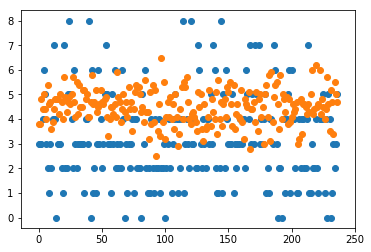

In [20]:
plt.scatter(stat.index, stat['Число бракованных листов']) 
plt.scatter(stat.index, stat['Скорость прокатки'])
plt.show()

Рассчитаем коэффициент корелляции

In [21]:
corr_coef_speed_spoil = np.corrcoef(stat['Число бракованных листов'],stat['Скорость прокатки'])[0,1]
print(corr_coef_speed_spoil)

0.0114726198106392


Также определим коэффициент бракованных партий (долю)

In [22]:
pivot3 = pd.pivot_table(stat, values='Число бракованных листов', 
                       index=['Статус скорости прокатки партии','Статус партии по БЛ'], 
                       aggfunc=len).rename(columns = {'Число бракованных листов': 'Число партий'})

In [57]:
print(pivot3)

                                                                                    Число партий
Статус скорости прокатки партии     Статус партии по БЛ                                         
Скорость проката больше 4           Бракованных листов в партии больше 3                      74
                                    Бракованных листов в партии равно или меньше 3           105
Скорость проката равно или меньше 4 Бракованных листов в партии больше 3                      23
                                    Бракованных листов в партии равно или меньше 3            35


In [49]:
HSpeed_mark_spoil_coef = spoil_coef(pivot3,'Число партий', 0, 1)
print(HSpeed_mark_spoil_coef)

0.4134078212290503


In [50]:
LSpeed_mark_spoil_coef = spoil_coef(pivot3,'Число партий', 2, 3)
print(LSpeed_mark_spoil_coef)

0.39655172413793105


In [28]:
results_2 = pd.DataFrame(
    {'Статус скорости прокатки партии': ['Скорость проката больше 4', 'Скорость проката равно или меньше 4'],
     'Коэффициент бракованных партий': [HSpeed_mark_spoil_coef, LSpeed_mark_spoil_coef]})

In [56]:
print(results_2)

       Статус скорости прокатки партии  Коэффициент бракованных партий
0            Скорость проката больше 4                        0.413408
1  Скорость проката равно или меньше 4                        0.396552


In [30]:
pivot4 = pd.pivot_table(stat, values='Число бракованных листов', 
                       index=['Статус скорости прокатки партии','Статус партии по БЛ'], columns = ['Марка стали'],
                       aggfunc=len)

In [60]:
pivot4

Марка стали                                                                          A  \
Статус скорости прокатки партии     Статус партии по БЛ                                  
Скорость проката больше 4           Бракованных листов в партии больше 3            39   
                                    Бракованных листов в партии равно или меньше 3  61   
Скорость проката равно или меньше 4 Бракованных листов в партии больше 3            14   
                                    Бракованных листов в партии равно или меньше 3  25   

Марка стали                                                                          B  
Статус скорости прокатки партии     Статус партии по БЛ                                 
Скорость проката больше 4           Бракованных листов в партии больше 3            35  
                                    Бракованных листов в партии равно или меньше 3  44  
Скорость проката равно или меньше 4 Бракованных листов в партии больше 3             9  
                                    Бракованных листов в партии равно или меньше 3  10

In [32]:
A_HSpeed_mark_spoil_coef = spoil_coef(pivot4,'A', 0, 1)
A_LSpeed_mark_spoil_coef = spoil_coef(pivot4,'A', 2, 3)
B_HSpeed_mark_spoil_coef = spoil_coef(pivot4,'B', 0, 1)
B_LSpeed_mark_spoil_coef = spoil_coef(pivot4,'B', 2, 3)

In [33]:
results_2_1 = pd.DataFrame(
    {'Марка стали': ['А', 'A', 'B', 'B'],
     'Статус скорости прокатки партии': ['Скорость проката больше 4', 'Скорость проката равно или меньше 4', 'Скорость проката больше 4', 'Скорость проката равно или меньше 4'],
     'Коэффициент бракованных партий':[A_HSpeed_mark_spoil_coef, A_LSpeed_mark_spoil_coef, B_HSpeed_mark_spoil_coef, B_LSpeed_mark_spoil_coef]})

In [34]:
results_2_1

,Марка стали,Статус скорости прокатки партии,Коэффициент бракованных партий
0,А,Скорость проката больше 4,0.390000
1,A,Скорость проката равно или меньше 4,0.358974
2,B,Скорость проката больше 4,0.443038
3,B,Скорость проката равно или меньше 4,0.473684
